In [2]:
import math
import random
import statistics as st
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline


In [4]:
def flip_coin(n):
    heads = 0
    tails = 0
    coin_flips = []
    for x in range(n):
        result = random.choice(['heads', 'tails'])
        if result == 'heads':
            heads += 1
        else:
            tails += 1
        if math.log2(x+1) % 1 == 0:
            coin_flips.append((heads, tails))
    return coin_flips

In [5]:
def diff_flips(list_tupes):
    diff_list = []
    for x, y in list_tupes:
        diff_list.append(abs(x-y))
    return diff_list

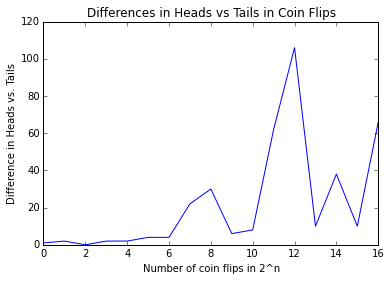

In [6]:
plt.plot(diff_flips(flip_coin(2**16)))
plt.xlabel("Number of coin flips in 2^n")
plt.ylabel("Difference in Heads vs. Tails")
plt.title("Differences in Heads vs Tails in Coin Flips")
plt.show()

In [9]:
def ratio_flips(list_tupes):
    ratios = []
    for x,y in list_tupes:
        ratios.append(x/(x+y))
    return ratios

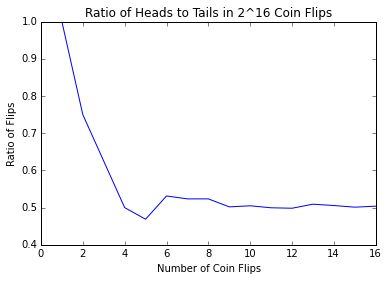

In [10]:
plt.plot(ratio_flips(flip_coin(2**16)))
plt.title("Ratio of Heads to Tails in 2^16 Coin Flips")
plt.ylabel("Ratio of Flips")
plt.xlabel("Number of Coin Flips")
plt.show()

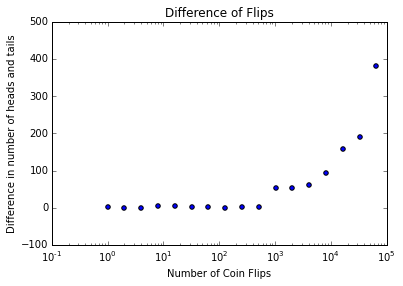

In [11]:
x_values = [2**0, 2**1, 2**2, 2** 3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16]

plt.scatter(x_values, diff_flips(flip_coin(2**16)))
plt.title("Difference of Flips")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Difference in number of heads and tails")
plt.xscale('log')
plt.show()

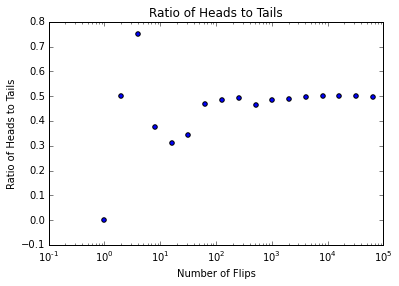

In [12]:
plt.scatter(x_values, ratio_flips(flip_coin(2**16)))
plt.title("Ratio of Heads to Tails")
plt.xlabel("Number of Flips")
plt.ylabel("Ratio of Heads to Tails")
plt.xscale('log')
plt.show()

It is interesting to see the 'random walk' in effect in the differences graph. The ratio graph is interesting in how in stabilizes fairly quickly. In the first few data points the small sample set allows for potentially large ratios. However as the data set gets larger it also stabilizes somewhat.

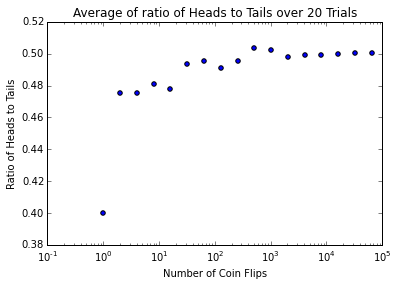

In [13]:
def twenty_trials():
    all_ratios = []
    for x in range(20):
        all_ratios.append(ratio_flips(flip_coin(2**16)))
    return all_ratios

final_ratios = []
for x in list(zip(*twenty_trials())):
    final_ratios.append(st.mean(x))

plt.scatter(x_values, final_ratios)
plt.title("Average of ratio of Heads to Tails over 20 Trials")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Ratio of Heads to Tails")
plt.xscale('log')
plt.show()

The data quickly equalizes to show a ratio that hovers right around .50, which is what we expect.

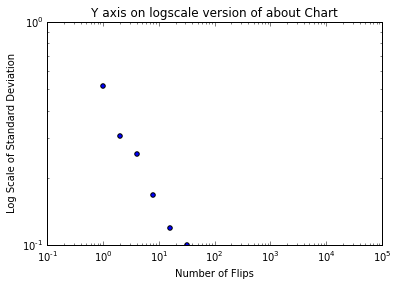

In [14]:
stddev = []
for x in list(zip(*twenty_trials())):
    stddev.append(st.stdev(x))
plt.scatter(x_values, stddev)
plt.yscale('log')
plt.xscale('log')
plt.title("Y axis on logscale version of about Chart")
plt.xlabel("Number of Flips")
plt.ylabel("Log Scale of Standard Deviation")
plt.show()

The log y axis seems to lose many of the data points. 

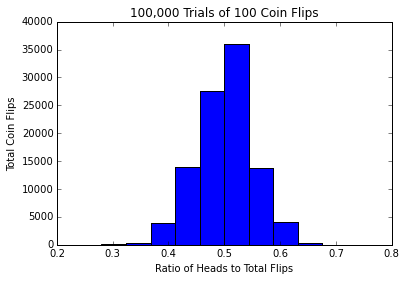

In [15]:
def new_flip(n):
    heads = 0
    for x in range(n):
        flip = random.choice(['heads','tails'])
        if flip == 'heads':
            heads += 1
    return heads/100
            
def trials(n):
    res = [new_flip(100) for x in range(n)]
    return res

plt.hist(trials(100000))
plt.title("100,000 Trials of 100 Coin Flips")
plt.xlabel("Ratio of Heads to Total Flips")
plt.ylabel("Total Coin Flips")
plt.show()

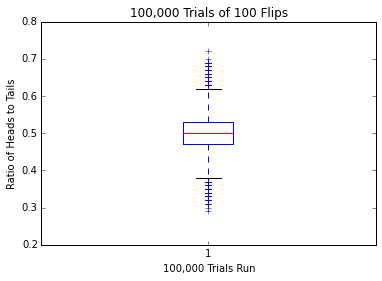

In [16]:
plt.boxplot(trials(100000))
plt.title("100,000 Trials of 100 Flips")
plt.ylabel("Ratio of Heads to Tails")
plt.xlabel("100,000 Trials Run")
plt.show()

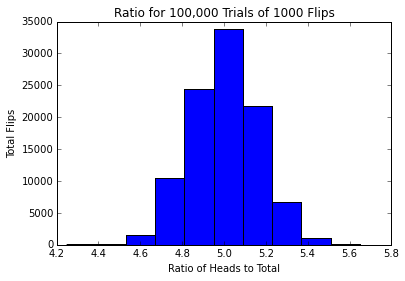

In [17]:
def trials_thousand(n):
    res = [new_flip(1000) for x in range(n)]
    return res

plt.hist(trials_thousand(100000))
plt.title("Ratio for 100,000 Trials of 1000 Flips")
plt.xlabel("Ratio of Heads to Total")
plt.ylabel("Total Flips")
plt.show()

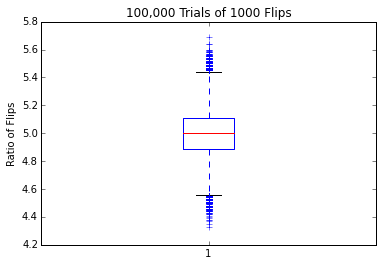

In [18]:
plt.boxplot(trials_thousand(100000))
plt.title("100,000 Trials of 1000 Flips")
plt.ylabel("Ratio of Flips")
plt.show()

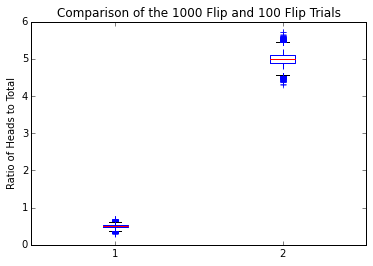

In [20]:
plt.boxplot([trials(100000), trials_thousand(100000)])
plt.title("Comparison of the 1000 Flip and 100 Flip Trials")
plt.ylabel("Ratio of Heads to Total")
plt.show()

#Large Data Sets
The larger datasets are interesting in their tendency towards uniformity. There is still a decent amount of variation, be we are seeing very clear gaussian trends in our histograms and boxplots. 